In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, HTML, display

from rdkit.Chem import rdRGroupDecomposition

IPythonConsole.ipython_useSVG=True
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## RGroup Decomposition Example

These structures are from chEMBL and Greg's RGroup Decomposition tutorial https://greglandrum.github.io/rdkit-blog/posts/2023-01-09-rgd-tutorial.html

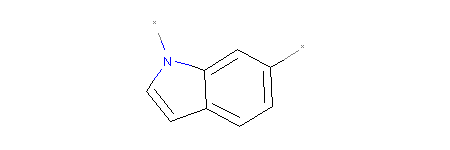

In [2]:
core1 = Chem.MolFromSmiles("[*]N1C=CC2=CC=C([*])C=C12 |$R1;;;;;;;;R2;;$|")
Chem.rdDepictor.Compute2DCoords(core1)
core1

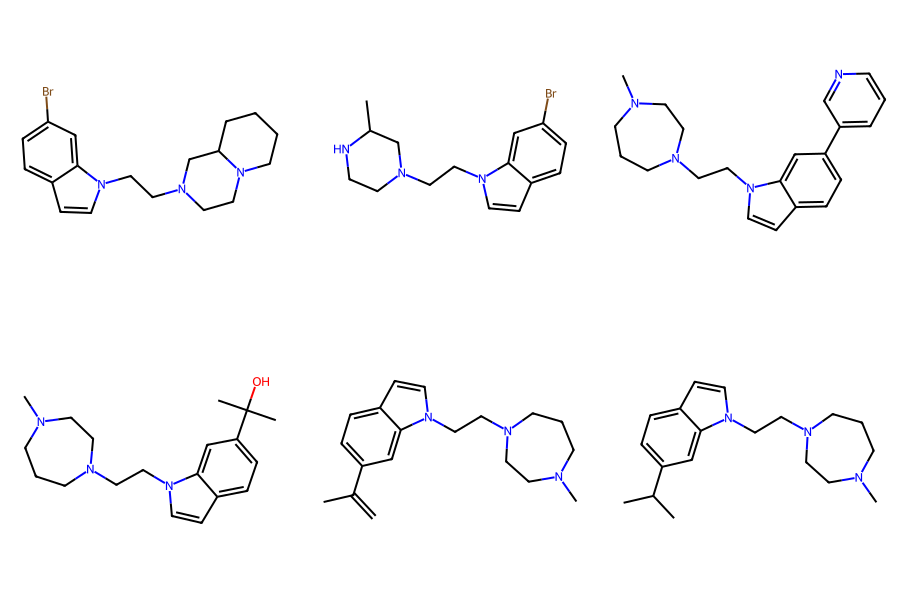

In [5]:
with open("mols.txt") as f:
    lines = f.readlines()
# we'll just look at a few of these for now
mols = [Chem.MolFromSmiles(l.split(" ")[1]) for l in lines]
core_mols = [m for m in mols]

# Here we are only looking at mols 2-8 for simplicity and because some don't match.
# you may need to clean this data somehow!
Draw.MolsToGridImage(core_mols[2:8], subImgSize=(300,300))

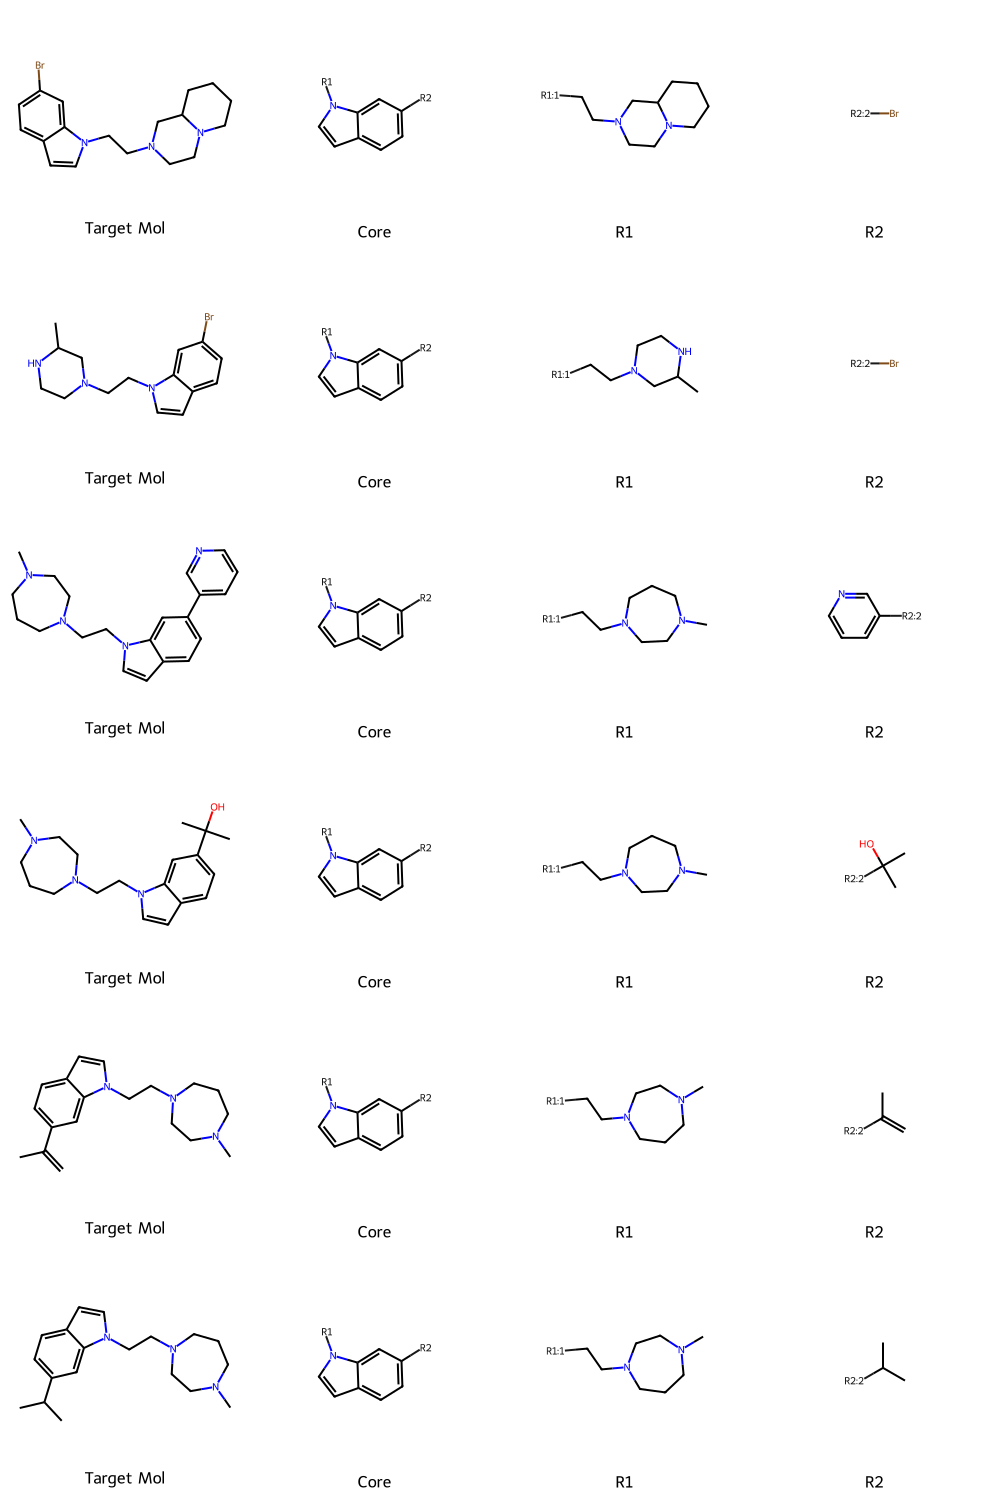

In [4]:
res, fails = rdRGroupDecomposition.RGroupDecompose([core1], core_mols[2:8])

legends = []
mols_to_display = []
for idx, decomp in enumerate(res,start=2):
    mols_to_display.append(core_mols[idx])
    legends.append("Target Mol")
    mols_to_display.extend(decomp.values())
    legends.extend(decomp.keys())

    # Note: MolsToGridImage can be useful for 
Draw.MolsToGridImage(mols_to_display, legends = legends, subImgSize=(250,250), molsPerRow=4)

## Further question: How do the different RGroups effect the chemical properties of the target mol?

With a limited dataset, this won't tell us much now -- but you can see how this could be helpful to chemists at a larger scale.

Small example: 

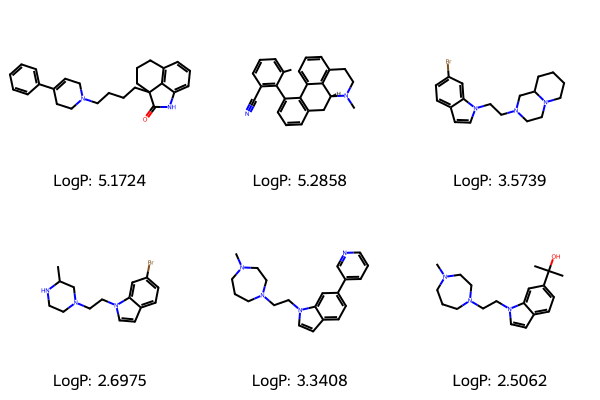

In [5]:
from rdkit.Chem import Descriptors

logp = [Descriptors.MolLogP(m) for m in core_mols[0:6]]
legends = [f"LogP: {round(v,5)}" for v in logp]
Draw.MolsToGridImage(core_mols[0:6], legends = legends)